In [6]:
%matplotlib inline
import pandas as pd

In [5]:
titles = pd.read_csv('data/titles.csv')
titles = titles[titles['year'] <= 2015]
titles.head()

,title,year
0,Berlian si Etty,2013
1,The Mighty,1929
2,Little Black Spiders,2012
3,Twelve O'Clock High,1949
4,D4,2011


In [41]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Natas es Satan,1977,Ramon 'Cartucho' Pena,actor,Nigth Club Owner,NaN
2,Los tarantos,1963,'El Guisa',actor,Bailaor,25.0
3,Los tarantos,1963,'El Viti',actor,Cantaor,20.0
4,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [52]:
c=cast[(cast['character']=='Batman') | (cast['character']=='Superman')].groupby(['character','year']).size()
res=c.unstack('character').fillna(0)
res[res['Batman']<res['Superman']]

character,Batman,Superman
year,,
1948,0.0,1.0
1950,0.0,1.0
1951,0.0,2.0
1954,0.0,5.0
1955,0.0,1.0
1973,1.0,2.0
1978,0.0,2.0
1980,0.0,2.0
1983,0.0,2.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [51]:
res[res['Batman']>res['Superman']]

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1949,2.0,0.0
1953,2.0,0.0
1957,2.0,0.0
1965,1.0,0.0
1966,1.0,0.0
1967,1.0,0.0


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

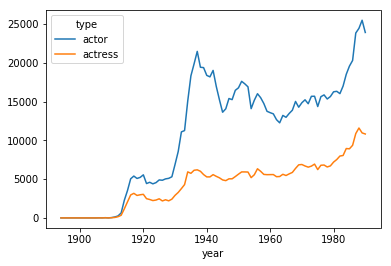

In [24]:
c=cast.groupby(['type','year']).size()
g=c.unstack('type').fillna(0)
g.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

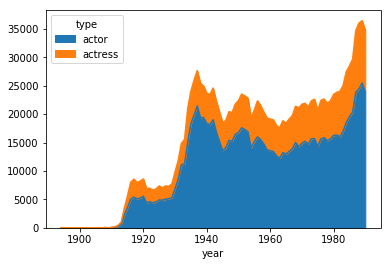

In [25]:
g.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

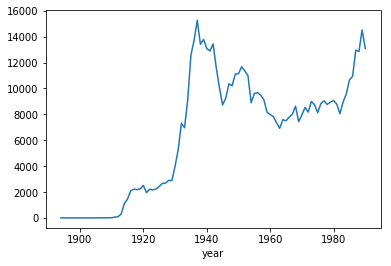

In [26]:
(g['actor'] - g['actress']).plot();

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

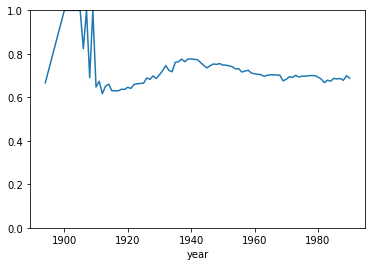

In [27]:
(g.actor/(g.actor+g.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

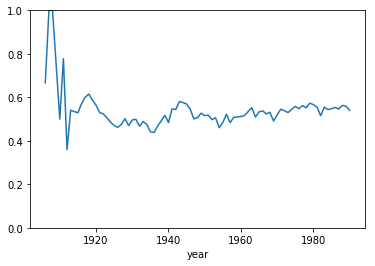

In [34]:
c=cast[cast['n']==2].groupby(['type','year']).size()
g=c.unstack('type').fillna(0)
(g.actor/(g.actor+g.actress)).plot(ylim=[0,1])